In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Path to your train and test image dataset directories
train_dir = 'C:\\Users\\zack\\Desktop\\memoir M2\\dataset\\dataset\\Train and Validation Set'
test_dir = 'C:\\Users\\zack\\Desktop\\memoir M2\\dataset\\dataset\\Test Set'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
# Load images from train folder
train_dataset = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',  # Adjust label mode as needed
    image_size=(128, 128),
    batch_size=32,
    shuffle=True,
    seed=42
)

# Load images from test folder
test_dataset = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',  # Adjust label mode as needed
    image_size=(128, 128),
    batch_size=32,
    shuffle=False,  # No need to shuffle test data
    seed=42
)

Found 9000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [8]:
# Extract images and labels from the generator
train_images, train_labels = [], []
for image_batch, label_batch in train_dataset:
    train_images.extend(image_batch.numpy())
    train_labels.extend(label_batch.numpy())

test_images, test_labels = [], []
for image_batch, label_batch in test_dataset:
    test_images.extend(image_batch.numpy())
    test_labels.extend(label_batch.numpy())


In [9]:
# Convert lists to numpy arrays
train_images = np.array(train_images)
y_train = np.array(train_labels)
test_images = np.array(test_images)
y_test = np.array(test_labels)

# Flatten image data
x_train = train_images.reshape(train_images.shape[0], -1)
x_test = test_images.reshape(test_images.shape[0], -1)


In [10]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train,y_train)


C:\Users\zack\AppData\Local\Temp\ipykernel_8056\3771567561.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predict the labels for the training data
y_pred_test = rf_classifier.predict(x_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.832


In [12]:
# Compute F1-score
f1 = f1_score(y_test, y_pred_test)
print("Training F1-score:", f1)


Training F1-score: 0.8444444444444443


In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics
print(" Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy: 0.832
Training F1-score: 0.8444444444444443
Training Precision: 0.7862068965517242
Training Recall: 0.912
Confusion Matrix:
[[376 124]
 [ 44 456]]


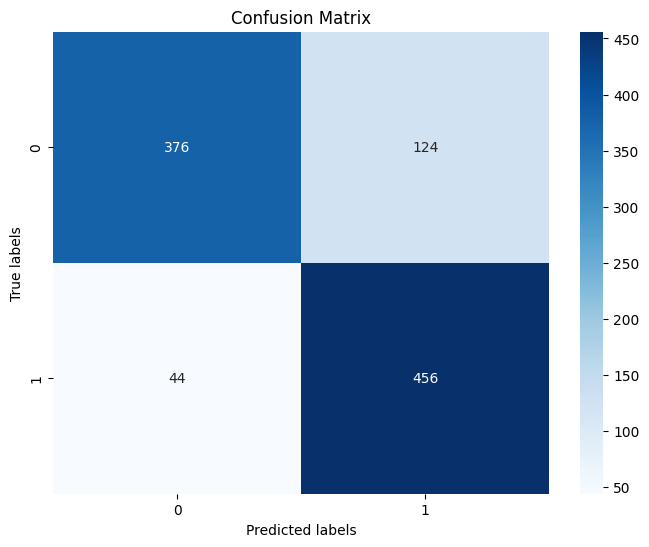

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()




In [15]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

In [16]:
svm_model.fit(x_train,y_train)

C:\Users\zack\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [19]:
# Predict the labels for the training data
y_pred_test2 = svm_model.predict(x_test)


Training Accuracy: 0.832


In [20]:

# Compute accuracy
accuracy2 = accuracy_score(y_test, y_pred_test2)
print("Training Accuracy:", accuracy2)

Training Accuracy: 0.751


In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test2)
f1 = f1_score(y_test, y_pred_test2)
precision = precision_score(y_test, y_pred_test2)
recall = recall_score(y_test, y_pred_test2)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test2)

# Print evaluation metrics
print(" Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

 Accuracy: 0.751
F1-score: 0.7419689119170985
Precision: 0.7698924731182796
Recall: 0.716
Confusion Matrix:
[[393 107]
 [142 358]]


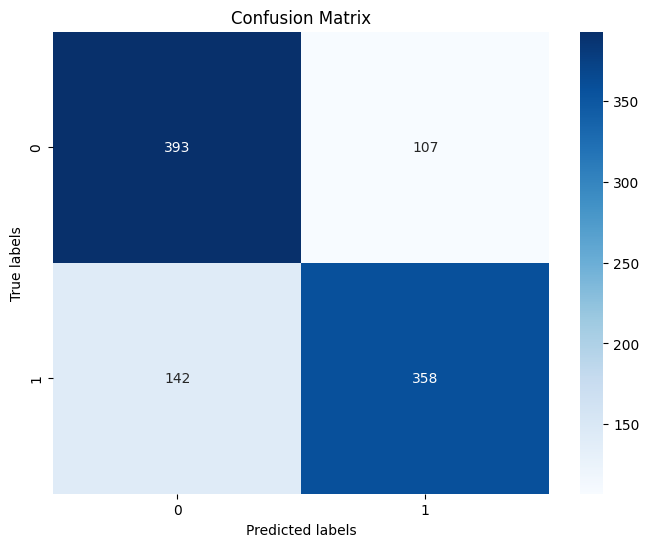

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


